In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re 
from wordcloud import WordCloud


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Exploring Fake News

In [120]:
# Importing datasets

fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')
true = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')


In [121]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

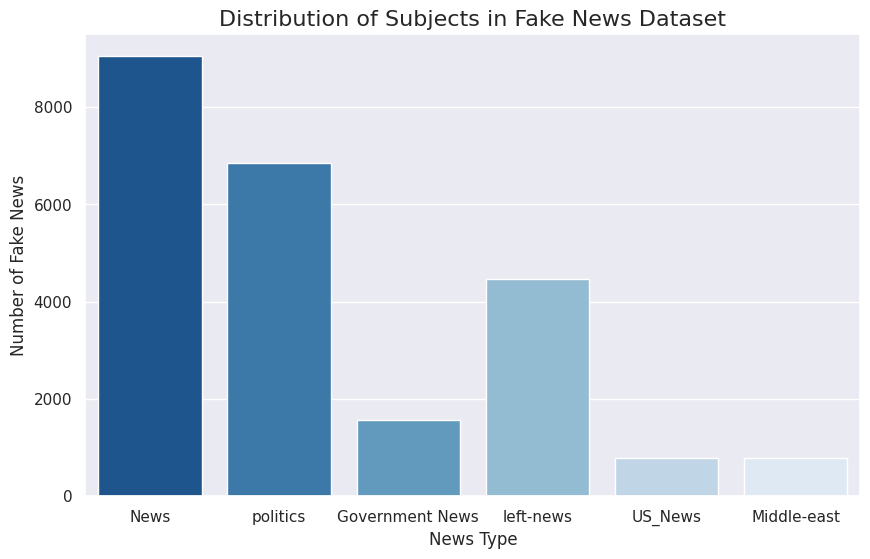

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a custom color palette with different intensities of blue
custom_palette = sns.color_palette("Blues_r", n_colors=6)


# set the color palette and plot the countplot
sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette(custom_palette)
sns.countplot(x='subject', data=fake)

# add a titles to the plot
plt.title('Distribution of Subjects in Fake News Dataset', fontsize=16)
plt.xlabel("News Type")
plt.ylabel("Number of Fake News")

# show the plot
plt.show()


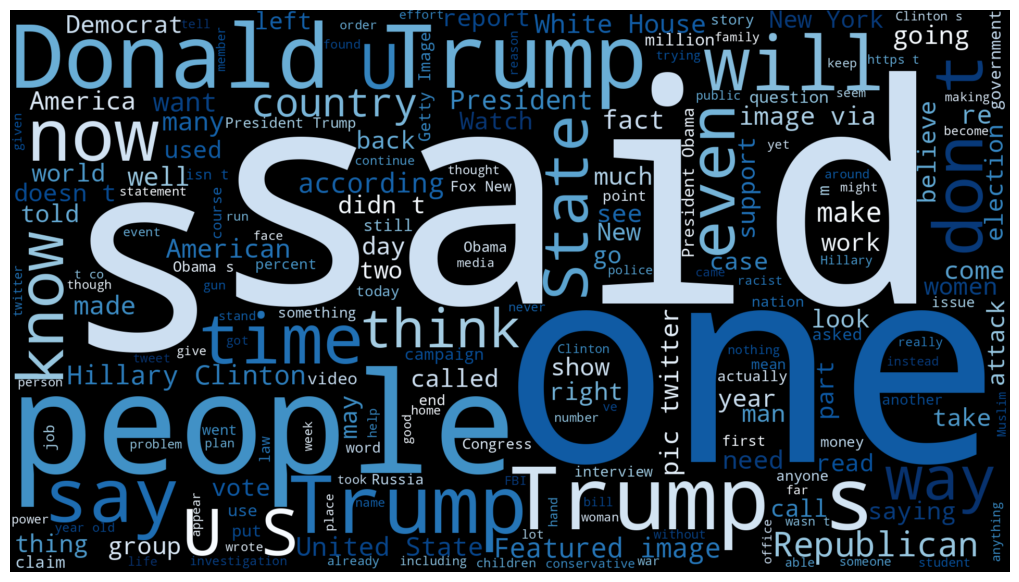

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# join the text of fake news articles
text = ' '.join(fake['text'].tolist())

# create a WordCloud object with the Blues_r color map
wordcloud = WordCloud(width=1920, height=1080, colormap='Blues_r').generate(text)

# create a figure and plot the WordCloud object
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.show()


# Exploring Real news

<AxesSubplot:xlabel='subject', ylabel='count'>

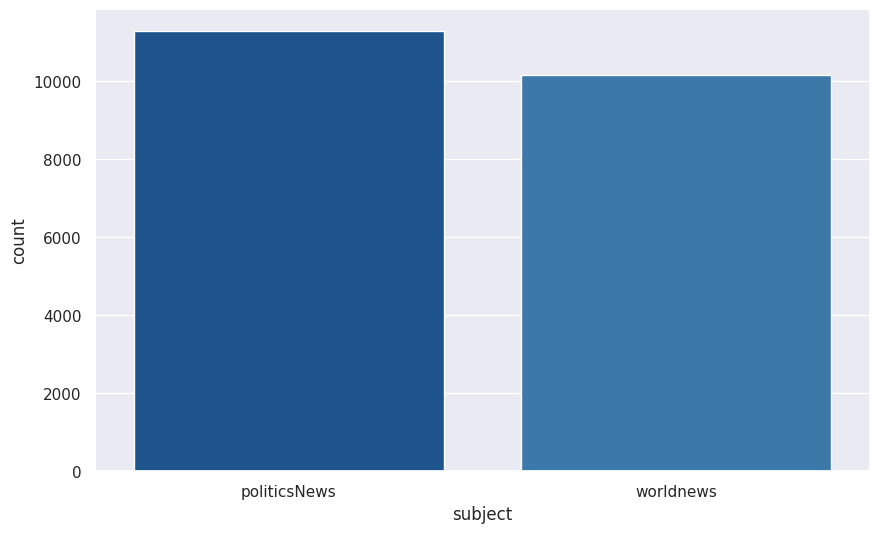

In [139]:
# create a custom color palette with different intensities of blue
custom_palette = sns.color_palette("Blues_r", n_colors=6)

# set the color palette and plot the countplot
sns.set(rc={'figure.figsize':(10,6)})
sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette(custom_palette)
sns.countplot(x = 'subject' , data = true)

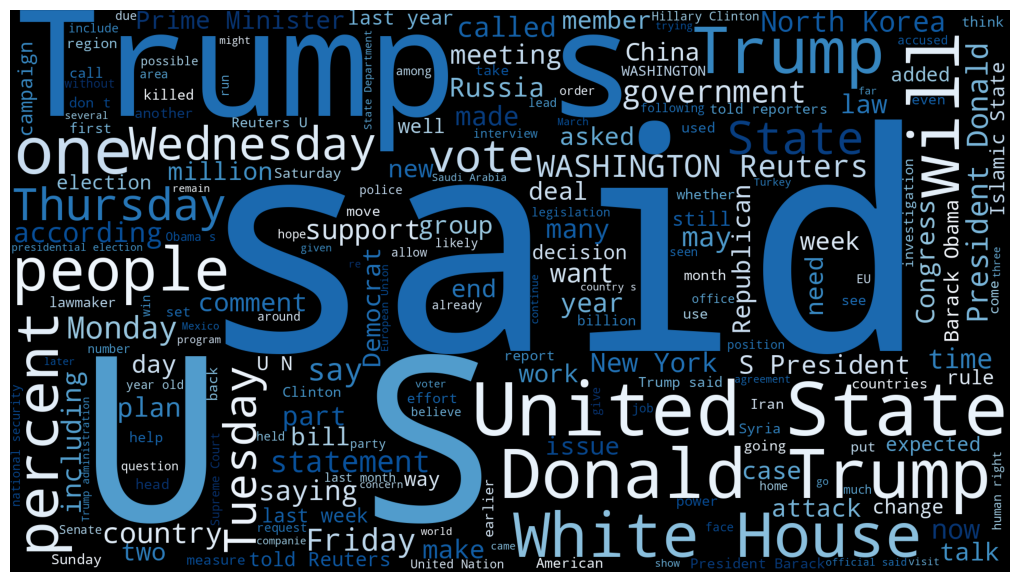

In [140]:
text2 = ' '.join(true['text'].tolist())
wordcloud2 = WordCloud(width = 1920,  colormap='Blues_r', height = 1080).generate(text2)
fig = plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(wordcloud2)
plt.tight_layout(pad=0)
plt.show()

# Cleaning Data

In [144]:
# Creating a list of unkown publishers 
unknown_publishers = []
for index,row in enumerate(true.text.values):
  try:
    record = row.split('-' , maxsplit = 1)
    assert(len(record[0]) < 120)
  except:
    unknown_publishers.append(index)

In [145]:
# Drop troubling rows 

true = true.drop(8970 , axis = 0)

In [146]:
# Creating a list of publishers (known ones) and and associated text column for each
publisher = []
tmp_text = []

for index,row in enumerate(true.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-' , maxsplit = 1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())



In [147]:
# Assigning each list to a column
true['publisher'] = publisher
true['text'] = tmp_text

In [148]:
true.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [149]:
[index for index,text in enumerate(fake.text.tolist()) if str(text).strip() == ""]

[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [150]:
true['text'] = true['text'] + ' ' + true['title']

In [19]:
fake['text'] = fake['text'] + ' ' + fake['title']

In [20]:
# Lower case all text
true['text'] = true['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

In [21]:
# Assign each class a binary value
true['class'] = 1
fake['class'] = 0

In [22]:
# Keep only relevant columns
true = true[['class' , 'text']]
fake = fake[['class' , 'text']]

In [79]:
# Append both dataframes into one dataset that has both real and fake news
true = true.append(fake , ignore_index = True)

In [27]:
! pip install spacy==2.2.3
! python -m spacy download en_core_web_sm
! pip install beautifulsoup4==4.9.1
! pip install textblob==0.15.3
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 KB 20.2 MB/s eta 0:00:00
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.6
    Uninstalling srsly-2.4.6:
      Successfully uninstalled srsly-2.4.6
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: blis
    Found existing installation: blis 0.7.9
    Uninstalling blis-0.7.9:
      Successfully uninstalled blis-0.7.9
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.7
    Uninstalling thinc-8.1.7:
      Successfully u

In [81]:
import preprocess_kgptalkie as ps

In [82]:
# Test remove_special_chars function
ps.remove_special_chars('this ,. @ # is great')

'this is great'

In [83]:
# Create a new dataframe to use in model and remove special characters from it
data = true
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

## Vectorization

In [84]:
import gensim

In [162]:
# X is all the texts and will be used as the predictor of whether a ceirtan news piece is fake
X = [d.split() for d in data['text'].tolist()]
y = data['class'].values

In [163]:
# Create a Word2Vec model, which creates vector representation of all words in the news texts 
dim = 100
w2v_model = gensim.models.Word2Vec(sentences = X , size = dim, window = 10, min_count=1)

In [164]:
# Learned vector representation of the the word love
w2v_model.wv['love']

array([ 2.8019748e+00, -4.5383107e-02, -6.4252567e-01,  1.3875905e-01,
        1.9745620e+00,  3.1381040e+00, -1.6453537e-01,  2.2216060e+00,
        3.8905711e+00, -1.7254809e+00, -2.4005487e+00,  2.0987756e+00,
        4.9465701e-01,  4.4845581e+00, -1.8943195e+00,  3.4965823e+00,
       -4.2673073e+00,  2.5758419e+00,  1.5154743e+00,  2.6577680e+00,
       -8.1475490e-01,  2.7980106e+00,  3.1187621e-01,  2.2758765e+00,
       -3.4472961e+00, -2.3598137e+00, -4.9615794e-01, -1.5504827e+00,
        2.0340092e+00,  6.6042495e-01,  2.4592180e+00, -2.2613137e+00,
        1.0191075e+00,  1.3298912e+00,  4.4897041e+00, -2.2554626e+00,
        4.7711043e+00, -2.4025531e-01, -4.2698140e+00,  3.0533078e+00,
       -6.9437975e-01, -4.6752059e-01, -9.0818334e-01, -1.5540379e+00,
       -3.7814173e-01, -6.7153960e-01, -8.9306235e-01,  1.9146285e+00,
        2.6034305e+00, -2.7541745e+00, -9.9225247e-01,  9.4959432e-01,
       -2.0341799e+00,  1.4662848e-01, -2.1140976e+00, -7.9735154e-01,
      

In [165]:
# Use tokenizer to create a word index dictionary 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [167]:
# convert a list of texts, X, into a list of sequences of integers, where each 
# integer corresponds to a word in the text data and represents the index of that
# word in the word_index dictionary of the Tokenizer object.
X = tokenizer.texts_to_sequences(X)

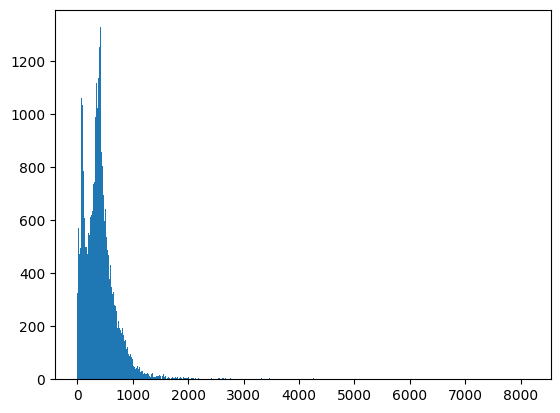

In [91]:
# Visualize the length of each sequence in X
plt.hist([len(x) for x in X] , bins = 700)
plt.show()

In [92]:
# Check how many sequences have > 1000 character length
nos = np.array([len(x) for x in X])
len(nos[nos > 1000])

1581

In [93]:
# Pad the sequences in the list X to ensure that all sequences have the same length.
maxlen = 1000
X = pad_sequences(X , maxlen = maxlen)

In [95]:
# Create a function that creates a weight_matrix that can be used as the initial weights 
# for an embedding layer in a neural network for natural language processing tasks.

# Each row in the weight matrix corresponds to the embedding vector of a word in the vocabulary,
#  and the rows are arranged in the same order as the integer indices assigned to the words in the word_index dictionary of the Tokenizer object.
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size , dim))

  for word,i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

embedding_vectors = get_weight_matrix(w2v_model)

In [97]:
embedding_vectors.shape

(231873, 100)

In [98]:
# Use sequential neural network for classification

# Create a new sequential object
model = Sequential()

# The Embedding layer maps each integer index in the input sequence to its
# corresponding pre-trained Word2Vec embedding vector. 
model.add(Embedding(vocab_size , output_dim = dim, weights = [embedding_vectors] , input_length = maxlen, trainable = False))

# Add a LSTM layer with 128 hidden units to the model. 
model.add(LSTM(units = 128))

# The output of the model will be a probability score between 0 and 1 
# indicating the likelihood of the input sequence belonging to the positive class 
model.add(Dense(1,activation= 'sigmoid'))


model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['acc'])


In [99]:
# Summarize model 

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 100)         23187300  
                                                                 
 lstm_3 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [100]:
# Split data into training and testing sets

X_train , X_test , y_train, y_test = train_test_split(X , y)

In [101]:
# Train model 

model.fit(X_train , y_train , validation_split = 0.3 , epochs =6)

Epoch 1/6
737/737 [==============================] - 1280s 2s/step - loss: 0.0838 - acc: 0.9703 - val_loss: 0.0470 - val_acc: 0.9824
Epoch 2/6
737/737 [==============================] - 1254s 2s/step - loss: 0.0317 - acc: 0.9898 - val_loss: 0.0423 - val_acc: 0.9858
Epoch 3/6
737/737 [==============================] - 1234s 2s/step - loss: 0.0182 - acc: 0.9945 - val_loss: 0.0432 - val_acc: 0.9868
Epoch 4/6
737/737 [==============================] - 1262s 2s/step - loss: 0.0059 - acc: 0.9984 - val_loss: 0.0423 - val_acc: 0.9877
Epoch 5/6
737/737 [==============================] - 1248s 2s/step - loss: 0.0058 - acc: 0.9984 - val_loss: 0.0443 - val_acc: 0.9891
Epoch 6/6
737/737 [==============================] - 1247s 2s/step - loss: 0.0072 - acc: 0.9978 - val_loss: 0.0516 - val_acc: 0.9843


In [102]:
# Make predictions

y_pred = (model.predict(X_test) >= 0.5).astype(int)

351/351 [==============================] - 185s 522ms/step


In [104]:
# Get testing accuracy

accuracy_score(y_test , y_pred)

0.985478841870824

In [105]:
# Get model metrics 

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5916
           1       0.99      0.98      0.98      5309

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [116]:
# Test model with a small example

x = ['this is a small text of news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x , maxlen = maxlen)

In [118]:
(model.predict(x) >= 0.5).astype(int)

1/1 [==============================] - 0s 217ms/step


array([[0]])